Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image 
from sklearn.model_selection import train_test_split

link to dataset on kaggle https://www.kaggle.com/datasets/omkargurav/face-mask-dataset

In [9]:
# getting names of files in each directory
with_mask_files = os.listdir('./data/with_mask')
without_mask_files = os.listdir('./data/without_mask')

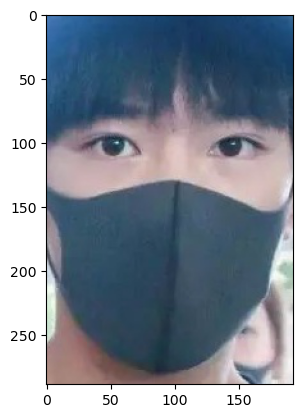

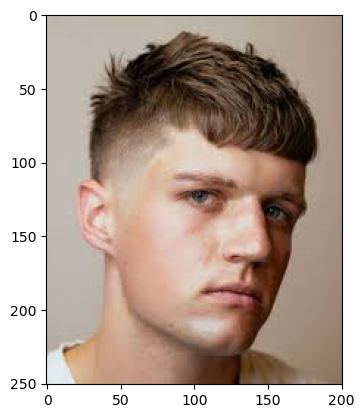

In [27]:
# display images from dataset
img = mpimg.imread('./data/with_mask/' + with_mask_files[21])
imgplot = plt.imshow(img)
plt.show()

img = mpimg.imread('./data/without_mask/' + without_mask_files[21])
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [3]:
with_mask_path = './data/with_mask/'

# list of all processed images in dataset, first 3725 are with mask, remaining 3828 images are without mask (total 7553 images)
data = []

for img in with_mask_files:

  image = Image.open(with_mask_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = './data/without_mask/'
for img in without_mask_files:

  image = Image.open(without_mask_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

X = np.array(data)


C:\Users\miran\anaconda3\envs\pythonProject\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
# data labels 1 = with mask, 0 = without mask
labels = [1]*3725 + [0]*3828
Y = np.array(labels)


Spliting dataset into training and testing datasets

In [5]:
# x = images, y = labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# scaling data, so all values in array are [0,1]
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [6]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# compile NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# train model
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 414s 2s/step - loss: 0.4634 - acc: 0.8047 - val_loss: 0.2656 - val_acc: 0.8942
Epoch 2/5
170/170 [==============================] - 340s 2s/step - loss: 0.2770 - acc: 0.8917 - val_loss: 0.2295 - val_acc: 0.9091
Epoch 3/5
170/170 [==============================] - 380s 2s/step - loss: 0.2465 - acc: 0.9038 - val_loss: 0.2272 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 355s 2s/step - loss: 0.1975 - acc: 0.9246 - val_loss: 0.1946 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 350s 2s/step - loss: 0.1540 - acc: 0.9402 - val_loss: 0.2865 - val_acc: 0.9190


Model Evaluation

In [7]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 21s 432ms/step - loss: 0.3024 - acc: 0.9193
Test Accuracy = 0.9192587733268738
